# Step 1 - Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/Users/amit/Documents/Primere Project hamoye/Data/dementia_dataset.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
df.shape

(373, 15)

Data Contains both the Numerical(int and float dtypes) and Categorical varables

In [4]:
df.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [5]:
# so we have 3 types of labels that we have to predict 
df['Group'].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

## Missing Data

In [6]:
df.isnull().mean()  # so we can see that we have 3 features with the missing data 'MMSE' and SES

Subject ID    0.000000
MRI ID        0.000000
Group         0.000000
Visit         0.000000
MR Delay      0.000000
M/F           0.000000
Hand          0.000000
Age           0.000000
EDUC          0.000000
SES           0.050938
MMSE          0.005362
CDR           0.000000
eTIV          0.000000
nWBV          0.000000
ASF           0.000000
dtype: float64

In [7]:
df.isnull().sum()  # both the features with missing feature are continuous numerical features

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [8]:
# Visaual representation of the missing variables 

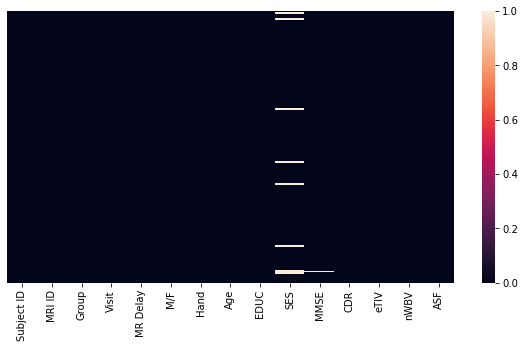

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull() , cbar=True , yticklabels=False)
plt.show()

## Categorical Features

In [10]:
features_categorical = [feature for feature in df.columns if df[feature].dtypes=='O' and feature!='Subject ID' and feature!='MRI ID' and feature!='Group']
features_categorical

['M/F', 'Hand']

So we have 2 categorical features in our dataset

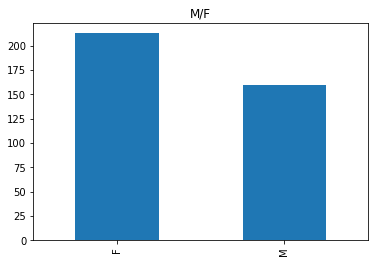

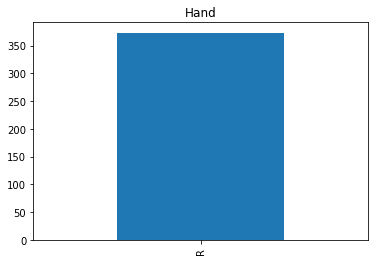

In [11]:
for feature in features_categorical:
    df[feature].value_counts().plot.bar()
    plt.title(feature)
    plt.show()

We can see that M/F has only F and M feature . Where as R has only R (1 label)

## Numerical Features

In [12]:
features_numerical=[feature for feature in df.columns if df[feature].dtypes!='O']
features_numerical

['Visit',
 'MR Delay',
 'Age',
 'EDUC',
 'SES',
 'MMSE',
 'CDR',
 'eTIV',
 'nWBV',
 'ASF']

In [13]:
len(features_numerical)   # There are total 10 numerical features in the dataset

10

In [14]:
features_numerical_discreate = [feature for feature in features_numerical if len(df[feature].unique())<25]
print(features_numerical_discreate)
print('So the length of the numerical discreate features in our dataset are : ' , len(features_numerical_discreate))

['Visit', 'EDUC', 'SES', 'MMSE', 'CDR']
So the length of the numerical discreate features in our dataset are :  5


In [15]:
features_numerical_continous = [feature for feature in features_numerical if len(df[feature].unique())>25]
print(features_numerical_continous)
print('So the length of the numerical continous features in our dataset are : ' , len(features_numerical_continous))

['MR Delay', 'Age', 'eTIV', 'nWBV', 'ASF']
So the length of the numerical continous features in our dataset are :  5


__Distribution of the numerical continous features__

__Using:-__

- Histogram
- Q-Q plot

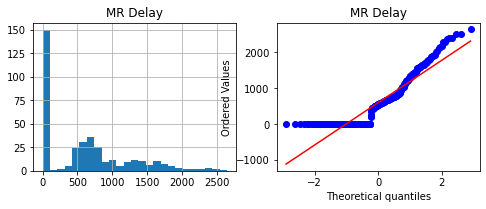

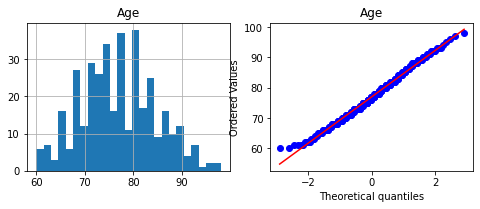

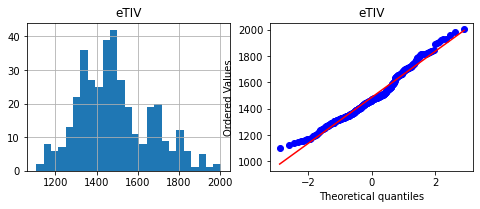

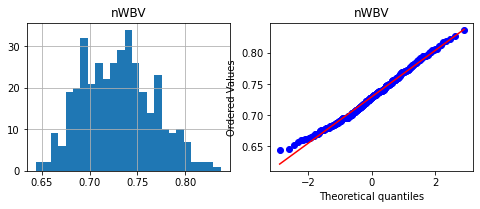

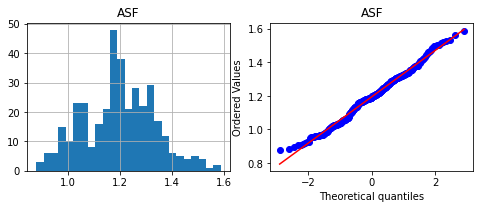

In [16]:
from scipy.stats import probplot
for feature in features_numerical_continous:
    plt.figure(figsize=(8,6))
    
    plt.subplot(2,2,1)
    df[feature].hist(bins=25)
    plt.title(feature)
    
    plt.subplot(2,2,2)
    probplot(df[feature] , dist='norm' , plot=plt)
    plt.title(feature)
    
    plt.show()

So the conclusion we can derive from the above plots are Only 1 feature in our dataset is not gaussian in nature it is skewed. 

And later in the Feature Engineering stage it should be converted into gaussian.

## Rare labels 

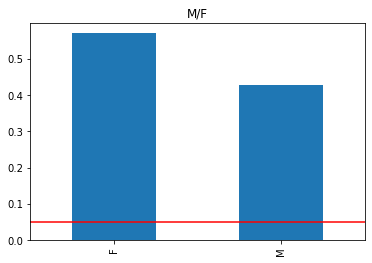

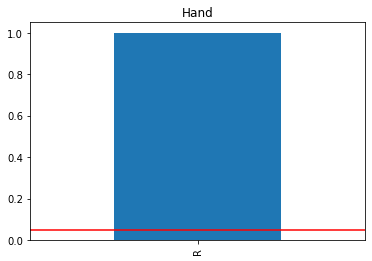

In [17]:
for feature in features_categorical:
    fig = pd.Series(df[feature].value_counts()/len(df)).plot.bar()
    fig.axhline(y=0.05 , color='red')  # assuming 5% of the data
    fig.set_title(feature)
    plt.show()


There are no Rare Label in the Dataset (In categorial feature)

## Outliers 
- by Boxplot

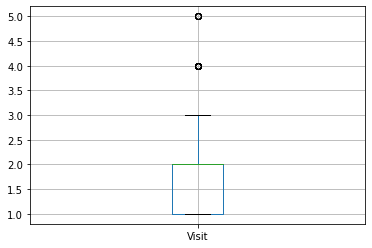

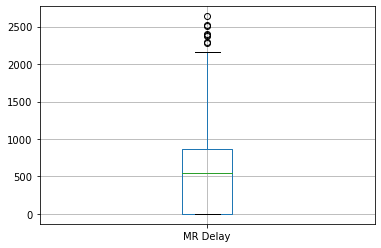

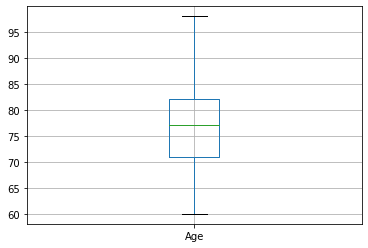

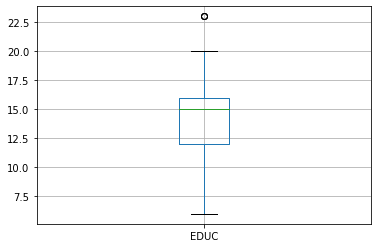

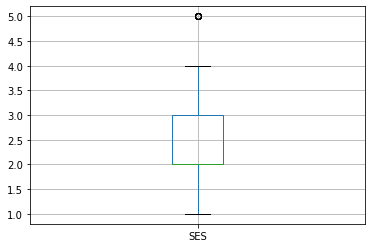

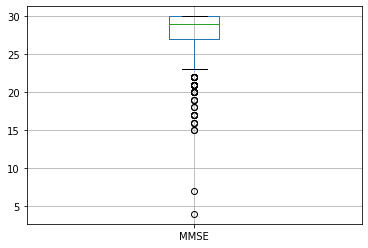

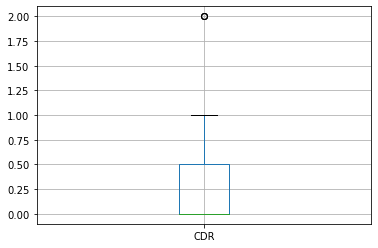

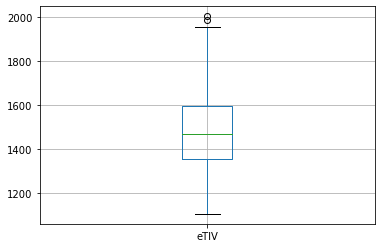

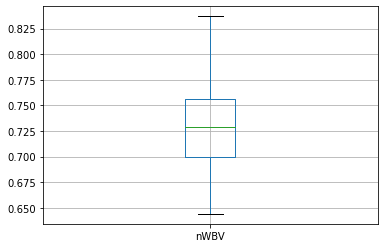

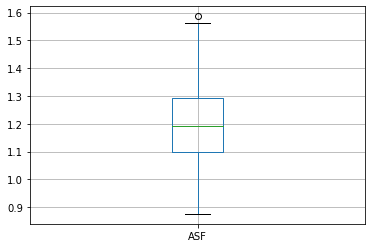

In [18]:
for feature in features_numerical:
    df.boxplot(column=feature)
    plt.show()

So we can see from the plots above that there are outliers in our dataset that needs to be removed later 